In [1]:
#----------------------IMPORT DEPENDENCIES---------------------------
#-------------------
import numpy as np  #LIBRARY TO WORK WITH ARRAYS
import pandas as pd   #LIBRARY TO MAKE DATAFRAMES, DATAFRAMES ARE STRUCTURED TABLES
import matplotlib.pyplot as plt # FOR PLOTTING AS WE NEED TO MAKE SOME DATA ANALYSIS
import seaborn as sns #Seaborn is an open-source Python library built on top of matplotlib. 
                        #It is used for data visualization and exploratory data analysis. 
                        #Seaborn works easily with dataframes and the Pandas library. 
                        #The graphs created can also be customized easily
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor #XGBOOST IS THE LIBRARY
from sklearn import metrics #The sklearn.metrics module implements functions assessing prediction error for specific purposes


In [2]:
#----------------------------------DATA COLLECTION & PROCESSING-----------------------------

In [3]:
#loading data from csv file into pandas dataframe 
calories= pd.read_csv("calories.csv")

In [4]:
#print first 5 rows of the dataframe : use head function
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data = pd.read_csv("exercise.csv")

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
#Combining 2 dataframes
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1) 
#here we need only calories column from calories dataframe,
#axis =1 : represents joining column wise

In [8]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
#checking no of rows and columns 
calories_data.shape

(15000, 9)

In [10]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
#checking for missing values in each column
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
#----------------------------------------DATA ANALYSIS--------------------------------


In [13]:
#Get some STATISTICAL MEASURES about data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [14]:
# DATA VISUALISATION


In [15]:
# to set a basic theme 
sns.set()

C:\Users\HM358WJ\Anaconda3\envs\calories\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

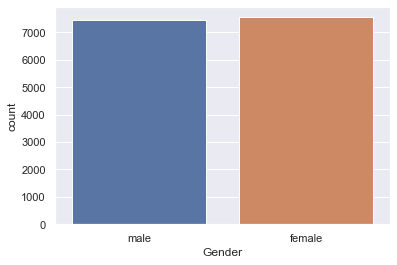

In [16]:
#plotting the gender, which is a ctegorical column , means it has only 2 values
sns.countplot(calories_data['Gender'])

C:\Users\HM358WJ\Anaconda3\envs\calories\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

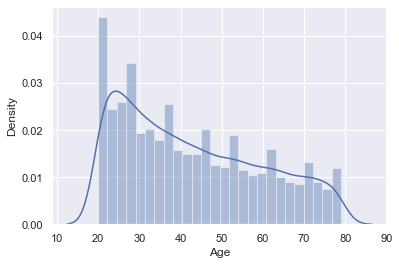

In [17]:
#plotting age, age has distinct values , not categorical
sns.distplot(calories_data['Age'])

C:\Users\HM358WJ\Anaconda3\envs\calories\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

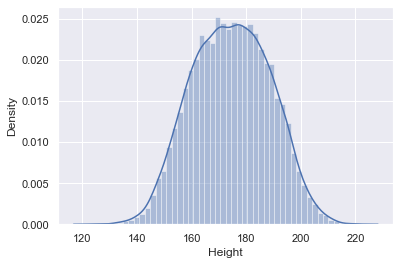

In [18]:
#plotting height, age has distinct values , not categorical
sns.distplot(calories_data['Height'])

C:\Users\HM358WJ\Anaconda3\envs\calories\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

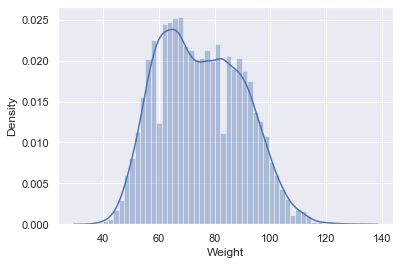

In [19]:
#plotting weight, age has distinct values , not categorical
sns.distplot(calories_data['Weight'])

C:\Users\HM358WJ\Anaconda3\envs\calories\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

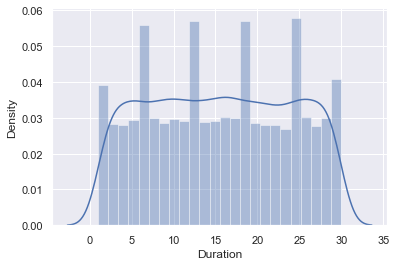

In [20]:
#plotting duration, age has distinct values , not categorical
sns.distplot(calories_data['Duration'])

In [21]:
#--------------FINDING CORRELATION B/W DATASET

In [22]:
correlation = calories_data.corr()

<AxesSubplot:>

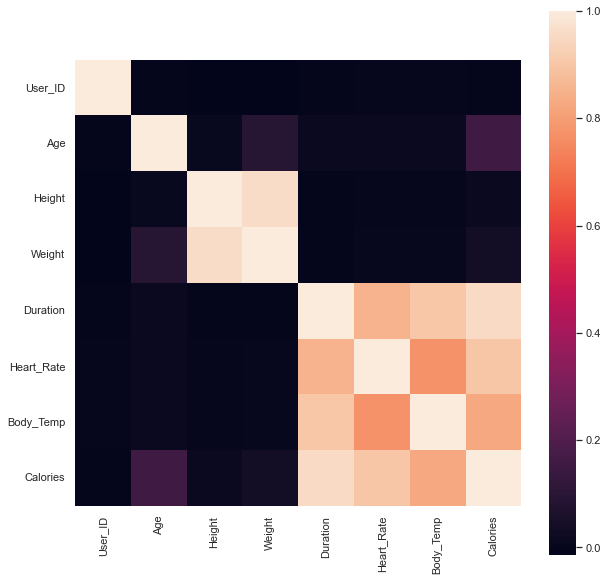

In [23]:
#constructing  a heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square= True, fmt = '.')

In [24]:
#Here we can see that the correlation value between Caories and Heart Rate, Caories and Body Temp are high and b/w 0.8 to 1. 
#Means highly correlated

In [25]:
#------Converting Text data to numerical values

In [26]:
calories_data.replace({'Gender': {'male' : 0, 'female' : 1}}, inplace=True)

In [27]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [28]:
#----------------------------SEPARATING FEATURES AND TARGET-----------------------------

In [29]:
X = calories_data.drop(columns = ['User_ID', 'Calories'], axis =1)
Y= calories_data['Calories']   # conatins only calories column

In [30]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [31]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [32]:
#-------------SPLITTING DATA INTO TRAINING DATA AND TEST DATA

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [35]:
#--------------MODEL TRAINING

In [36]:
#XGBoost Regressor

In [37]:
#load the model
model = XGBRegressor()

In [38]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
#EVALUATE MODEL


In [40]:
#Prediction on Test Data
test_data_prediction= model.predict(X_test)

In [41]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [42]:
#------------MEAN ABSOLUTE ERROR
mae= metrics.mean_absolute_error(Y_test, test_data_prediction)

In [43]:
print("Mean Absolute Error =", mae)

Mean Absolute Error = 1.4807048829992613
